# Stable Diffusion for Webcomic Art Generation

This project aims to implement "stable diffusion" for image generation in order to assist artists in iterating upon concepts more quickly.

This project was built leveraging the Huggingface Diffusers library, which provides a flexible and easy-to-use implementation of stable diffusion. This allowed us to quickly and efficiently implement the algorithm, and focus on developing features and improvements specifically tailored to the needs of artists.

More information about Stable Diffusion can be found in the analysis document -- this notebook focuses on application.

## Conditional Image Generation

The most famous application for Stable Diffusion is "Conditional Image Generation", which allows you to input a prompt and receive an image which matches the prompt. Inutitively, you can think of this like a sort of "reverse image captioning", where you provide the caption rather than the image.

Huggingface Diffusers makes this process very easy, although you still need a relatively powerful machine to use it. To see an example of this, see the below

In [2]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "./stable-diffusion-v1-5",
    revision="fp16",
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")

prompt = "Robotic Cyborg Johns Hopkins"
image = pipe(prompt).images[0]  
image

ModuleNotFoundError: No module named 'torch'

Extremely simple! The majority of the code for this project is therefore spent around infrastructure to make this easy to use.

## Image to Image Diffusion

Stable Diffusion allows for "Image to Image Generation", which uses the latent representation of a "Source" image instead of a random noise starting point. This allows for relatively simple drawings to be used as starting points, with the more time-consuming intermediate technical steps to be completed by stable diffusion. For a use-case example, see the below

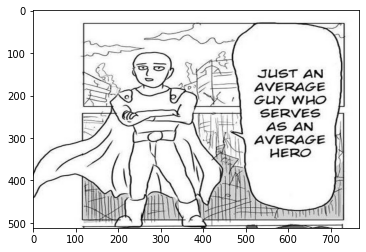

In [6]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# let's download an initial image
url = "https://cdn.discordapp.com/attachments/844700472820760576/1043294063060848743/MicrosoftTeams-image.png"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))
plt.imshow(init_image)

In [5]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

# load the pipeline
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "./stable-diffusion-v1-5", revision="fp16", torch_dtype=torch.float16
).to(device)

prompt = "a manga panel of a bald superhero wearing a belt, a cape, and boots, standing in front of a city landscape, extremely detailed"

images = pipe(prompt=prompt, init_image=init_image, strength=0.85, guidance_scale=7.5).images
images[0]

ModuleNotFoundError: No module named 'torch'

## How to use our code

Our code is a relatively straightforward implementation of the above. By default, the code will perform conditional image generation. If the path to an example image is passed, it will switch to image-to-image generation. That is to say:

**Conditional Generation**
```
python diffusion.py --prompt "A dinosaur on top of a skyscraper"
```

**Img2Img Generation**
```
python diffusion.py --prompt "A dinosaur on top of a skyscraper" --img /path/to/image
```

## Limitations

The original vision for this project was to include dreambooth and textual inversion. However, due to VRAM constraints, textual inversion was impossible unless more compute power was obtained. Dreambooth was somewhat difficult to get working, but an experimental version of it can be run with the following command:

```
python diffusion.py --prompt "On a rocket ship" --dream /path/to/folder
```